In [1]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn import model_selection
from sklearn import *


import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

# Data Prep

Read in the data

In [3]:
df = pd.read_csv("data/nba_1415.csv")

Using data from the 14-15 and 18-19 seasons, see if players have survived for 5 years. A `1` is used if the player is still playing in the 18-19 season, else a `0` is used.

In [35]:
df2 = set(pd.read_csv("data/nba_1819.csv")['Player'])
df1 = df['Player']

# names of repeated players
names = [item for item, count in collections.Counter(df1).items() if count > 1]
# locations of duplicate players
locations = [df.loc[df['Player'] == name] for name in names]

# if player survived 5 years
labels = [1 if player in df2 else 0 for player in df1]
df['Survived'] = labels

KeyError: 'Player'

Insert other data gathered on how many years in the league the players have been. See the write up for a detailed account of how we gathered the years-in-league (YIL) data.

In [5]:
tmp_df = pd.read_csv('data/final_years.csv')
yil = tmp_df['final_yil']
df.insert(24,'yil',yil)
del tmp_df

# Data Exploration

In [34]:
if not df.isnull().values.any():
    print("Phew! There are no null values")
    
if not df.isna().values.any():
    print("Phew! There are no NaNs")

Phew! There are no null values
Phew! There are no NaNs


In [6]:
df.head()

,Player,Season,Season Type,Team,Games,Min,Pts,OReb,Dreb,Reb,...,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%,yil,Survived
0,Russell Westbrook,2014-2015,REG,Thunder,67,34.36,28.15,1.87,5.45,7.31,...,21.96,0.426,1.28,4.30,0.299,8.15,9.76,0.835,7,1
1,James Harden,2014-2015,REG,Rockets,81,36.80,27.37,0.93,4.74,5.67,...,18.15,0.440,2.57,6.85,0.375,8.83,10.17,0.868,6,1
2,Kevin Durant,2014-2015,REG,Thunder,27,33.80,25.41,0.59,6.00,6.59,...,17.30,0.510,2.37,5.89,0.403,5.41,6.33,0.854,8,1
3,LeBron James,2014-2015,REG,Cavaliers,69,36.14,25.26,0.75,5.30,6.06,...,18.55,0.488,1.74,4.93,0.353,5.43,7.65,0.710,12,1
4,Anthony Davis,2014-2015,REG,Pelicans,68,36.10,24.35,2.53,7.68,10.21,...,17.63,0.535,0.01,0.18,0.083,5.46,6.78,0.805,3,1


Seems that Season, Season Type, Team, Player won't have an effect on whether the player will survive. Hard to quantify too. Will remove the aforementioned features.

In [7]:
df = df.drop(columns=['Season', 'Season Type', 'Team', 'Player'])
df.head()

,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,...,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%,yil,Survived
0,67,34.36,28.15,1.87,5.45,7.31,8.58,2.09,0.21,4.39,...,21.96,0.426,1.28,4.30,0.299,8.15,9.76,0.835,7,1
1,81,36.80,27.37,0.93,4.74,5.67,6.98,1.90,0.74,3.96,...,18.15,0.440,2.57,6.85,0.375,8.83,10.17,0.868,6,1
2,27,33.80,25.41,0.59,6.00,6.59,4.07,0.89,0.93,2.74,...,17.30,0.510,2.37,5.89,0.403,5.41,6.33,0.854,8,1
3,69,36.14,25.26,0.75,5.30,6.06,7.39,1.58,0.71,3.94,...,18.55,0.488,1.74,4.93,0.353,5.43,7.65,0.710,12,1
4,68,36.10,24.35,2.53,7.68,10.21,2.19,1.47,2.94,1.40,...,17.63,0.535,0.01,0.18,0.083,5.46,6.78,0.805,3,1


In [8]:
def feature_visualization(name, values, x):
    print(f'Visualizing features for {name}')
    plt.boxplot(values)


Visualizing features for Games


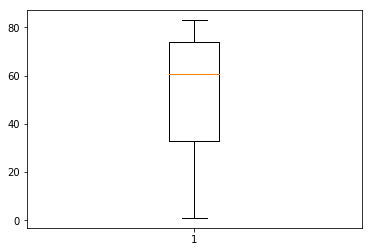

Visualizing features for Min


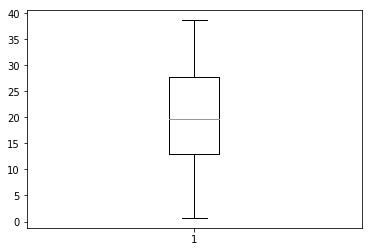

Visualizing features for Pts


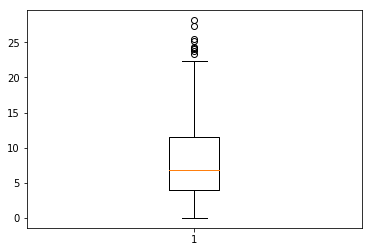

Visualizing features for OReb


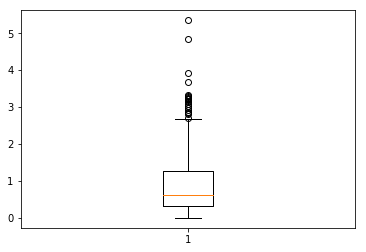

Visualizing features for Dreb


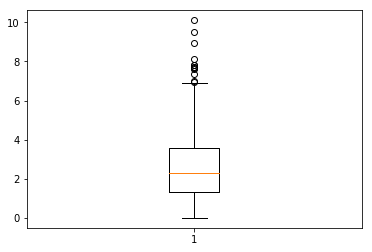

Visualizing features for Reb


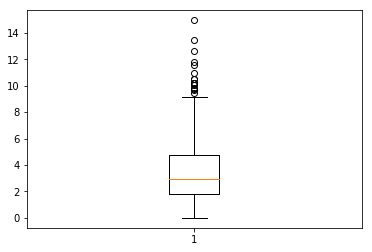

Visualizing features for Ast


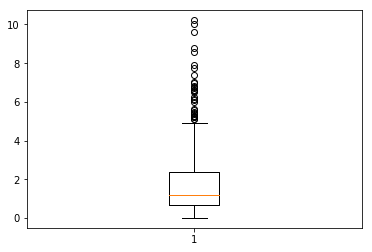

Visualizing features for Stl


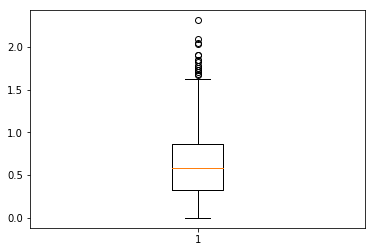

Visualizing features for Blk


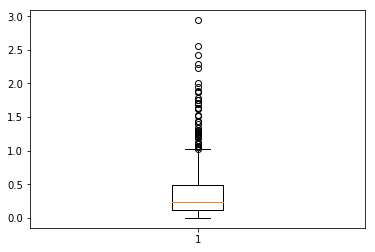

Visualizing features for TO


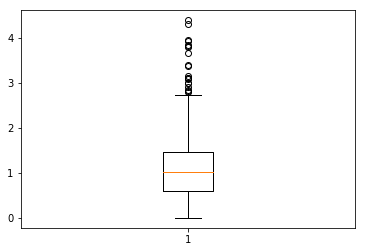

Visualizing features for PF


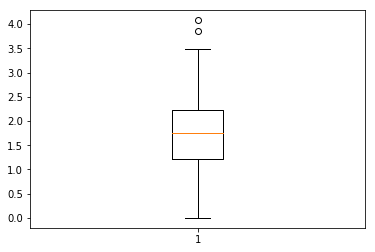

Visualizing features for FGM


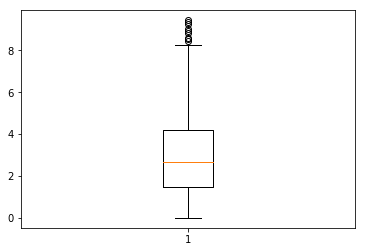

Visualizing features for FGA


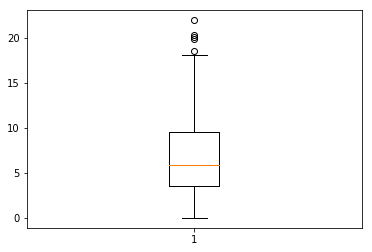

Visualizing features for FG%


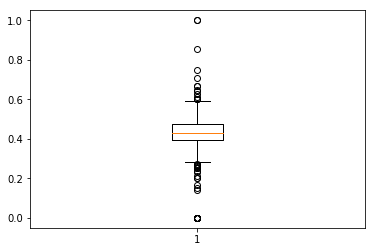

Visualizing features for 3PTM


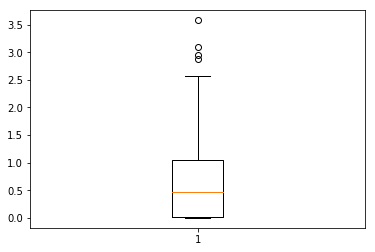

Visualizing features for 3PTA


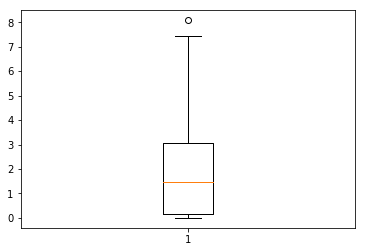

Visualizing features for 3PT%


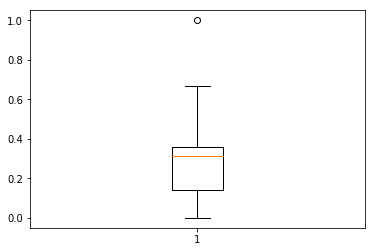

Visualizing features for FTM


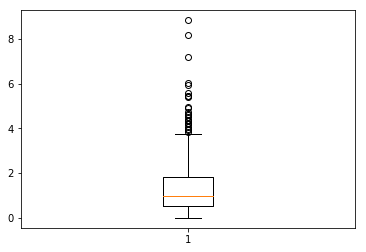

Visualizing features for FTA


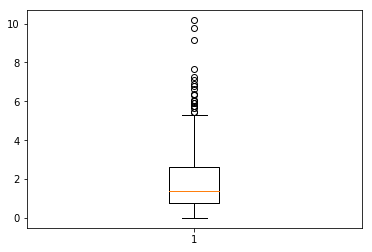

Visualizing features for FT%


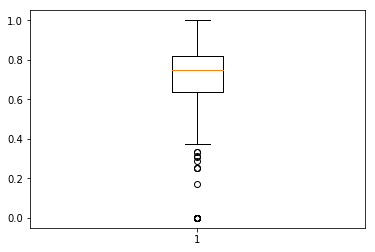

Visualizing features for yil


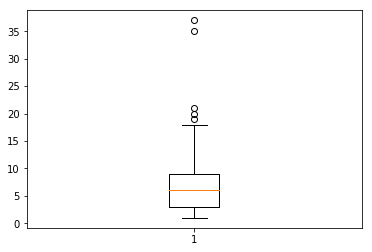

In [9]:
feature_names = df.columns.values[:-1]
for i, feature_name in enumerate(feature_names):
    feature_visualization(feature_name, df[feature_name], i+1)
    plt.show()

Thought it would be interesting to look at the distribution of data. Found a lot of outliers, however, since the data is not erroneous, the outliers are more due to anomalous players.

In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%,yil,Survived
Games,1,0.66,0.54,0.36,0.53,0.5,0.34,0.42,0.31,0.42,0.57,0.55,0.52,0.36,0.32,0.29,0.24,0.39,0.39,0.38,0.18,0.39
Min,0.66,1,0.89,0.41,0.72,0.66,0.65,0.75,0.36,0.79,0.7,0.9,0.9,0.26,0.53,0.53,0.35,0.73,0.74,0.36,0.17,0.46
Pts,0.54,0.89,1,0.35,0.67,0.6,0.64,0.69,0.32,0.81,0.57,0.99,0.98,0.26,0.55,0.54,0.35,0.89,0.87,0.38,0.15,0.43
OReb,0.36,0.41,0.35,1,0.79,0.9,-0.043,0.16,0.72,0.27,0.6,0.42,0.3,0.45,-0.3,-0.32,-0.31,0.34,0.44,-0.015,0.014,0.22
Dreb,0.53,0.72,0.67,0.79,1,0.98,0.29,0.45,0.68,0.56,0.71,0.71,0.63,0.4,0.065,0.047,-0.0002,0.59,0.65,0.15,0.16,0.37
Reb,0.5,0.66,0.6,0.9,0.98,1,0.19,0.37,0.73,0.49,0.71,0.65,0.55,0.43,-0.055,-0.075,-0.1,0.53,0.61,0.1,0.12,0.34
Ast,0.34,0.65,0.64,-0.043,0.29,0.19,1,0.7,-0.038,0.82,0.34,0.62,0.67,0.018,0.45,0.48,0.32,0.59,0.55,0.26,0.13,0.28
Stl,0.42,0.75,0.69,0.16,0.45,0.37,0.7,1,0.15,0.72,0.51,0.67,0.7,0.092,0.47,0.5,0.32,0.6,0.6,0.25,0.043,0.38
Blk,0.31,0.36,0.32,0.72,0.68,0.73,-0.038,0.15,1,0.21,0.51,0.37,0.26,0.42,-0.2,-0.22,-0.23,0.29,0.37,-0.021,0.02,0.24
TO,0.42,0.79,0.81,0.27,0.56,0.49,0.82,0.72,0.21,1,0.58,0.8,0.82,0.16,0.39,0.41,0.26,0.77,0.77,0.27,0.11,0.36


In [11]:
df = df.drop(columns=['FGA', '3PTA', 'FTA'])

Mention the highly correlated features and talk about removing them

# Feature Engineering

Care about how the points were made.

Define our epsilon

In [12]:
eps = .00001

In [ ]:
df['3P/T'] = 3*df['3PTM']/(df['Pts'] + eps)
df['FT/T'] = 2*df['FTM']/(df['Pts'] + eps)
df['FG/T'] = 1*df['FGM']/(df['Pts'] + eps)
df['TOP/M'] = (df['TO']+df['PF'])/(df['Min'] + eps)

Stats that correspond to offensive ability

In [ ]:
d_stats = df['Blk'] + df['Stl']
d_stats -= (d_stats.min() - eps)
d_stats /= d_stats.max()

Stats that correspond to offensive ability

In [ ]:
o_stats = df['FGM'] + df['OReb'] + df['Ast']
o_stats -= (o_stats.min() - eps)
o_stats /= o_stats.max()

Stats that correspond to shooting ability

In [ ]:
s_stats = df['3PTM'] + df['FTM']
s_stats -= (s_stats.min() - eps)
s_stats /= s_stats.max()

Tells how well rounded a player is

In [13]:
from scipy.stats import hmean
df['SPE'] = hmean(pd.DataFrame(np.array([d_stats,o_stats,s_stats]).reshape(-1,3)), axis=1)
# Put Survived at the end
df = df[[c for c in df if c != 'Survived'] + ['Survived']]
print(df.shape)
df.head()

(496, 24)


,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,...,3PT%,FTM,FT%,yil,3P/T,FT/T,FG/T,TOP/M,SPE,Survived
0,67,34.36,28.15,1.87,5.45,7.31,8.58,2.09,0.21,4.39,...,0.299,8.15,0.835,7,0.136412,0.579041,0.332504,0.207800,0.499093,1
1,81,36.80,27.37,0.93,4.74,5.67,6.98,1.90,0.74,3.96,...,0.375,8.83,0.868,6,0.281695,0.645232,0.291925,0.177446,0.499196,1
2,27,33.80,25.41,0.59,6.00,6.59,4.07,0.89,0.93,2.74,...,0.403,5.41,0.854,8,0.279811,0.425816,0.346714,0.124852,0.500151,1
3,69,36.14,25.26,0.75,5.30,6.06,7.39,1.58,0.71,3.94,...,0.353,5.43,0.710,12,0.206651,0.429929,0.357878,0.163254,0.359375,1
4,68,36.10,24.35,2.53,7.68,10.21,2.19,1.47,2.94,1.40,...,0.083,5.46,0.805,3,0.001232,0.448460,0.387680,0.096122,0.367997,1


##### Correlation Matrix of Full Dataset

In [14]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,FG%,3PTM,3PT%,FTM,FT%,yil,3P/T,FT/T,FG/T,TOP/M,SPE,Survived
Games,1,0.66,0.54,0.36,0.53,0.5,0.34,0.42,0.31,0.42,0.57,0.55,0.36,0.32,0.24,0.39,0.38,0.18,0.037,-0.047,0.23,-0.26,0.33,0.39
Min,0.66,1,0.89,0.41,0.72,0.66,0.65,0.75,0.36,0.79,0.7,0.9,0.26,0.53,0.35,0.73,0.36,0.17,0.043,0.014,0.15,-0.32,0.38,0.46
Pts,0.54,0.89,1,0.35,0.67,0.6,0.64,0.69,0.32,0.81,0.57,0.99,0.26,0.55,0.35,0.89,0.38,0.15,-0.0046,0.093,0.084,-0.23,0.36,0.43
OReb,0.36,0.41,0.35,1,0.79,0.9,-0.043,0.16,0.72,0.27,0.6,0.42,0.45,-0.3,-0.31,0.34,-0.015,0.014,-0.51,0.12,0.27,0.034,0.11,0.22
Dreb,0.53,0.72,0.67,0.79,1,0.98,0.29,0.45,0.68,0.56,0.71,0.71,0.4,0.065,-0.0002,0.59,0.15,0.16,-0.29,0.068,0.23,-0.098,0.26,0.37
Reb,0.5,0.66,0.6,0.9,0.98,1,0.19,0.37,0.73,0.49,0.71,0.65,0.43,-0.055,-0.1,0.53,0.1,0.12,-0.38,0.088,0.25,-0.058,0.23,0.34
Ast,0.34,0.65,0.64,-0.043,0.29,0.19,1,0.7,-0.038,0.82,0.34,0.62,0.018,0.45,0.32,0.59,0.26,0.13,0.082,0.042,0.015,-0.098,0.32,0.28
Stl,0.42,0.75,0.69,0.16,0.45,0.37,0.7,1,0.15,0.72,0.51,0.67,0.092,0.47,0.32,0.6,0.25,0.043,0.08,0.055,0.038,-0.17,0.28,0.38
Blk,0.31,0.36,0.32,0.72,0.68,0.73,-0.038,0.15,1,0.21,0.51,0.37,0.42,-0.2,-0.23,0.29,-0.021,0.02,-0.36,0.056,0.24,0.0077,0.087,0.24
TO,0.42,0.79,0.81,0.27,0.56,0.49,0.82,0.72,0.21,1,0.58,0.8,0.16,0.39,0.26,0.77,0.27,0.11,-0.056,0.08,0.1,0.04,0.33,0.36


#### Correlation Matrix of Reduced Dataset

Here we create a new dataset attempting to again tring to reduce cross feature correlation.

In [15]:
df_red = df.drop(columns=['Games', 'Pts', 'FGM', 'FTM', 'TO', 'Stl', 'OReb', 'Dreb', 'Reb', '3PTM', '3PT%'])

corr = df_red.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Min,Ast,Blk,PF,FG%,FT%,yil,3P/T,FT/T,FG/T,TOP/M,SPE,Survived
Min,1,0.65,0.36,0.7,0.26,0.36,0.17,0.043,0.014,0.15,-0.32,0.38,0.46
Ast,0.65,1,-0.038,0.34,0.018,0.26,0.13,0.082,0.042,0.015,-0.098,0.32,0.28
Blk,0.36,-0.038,1,0.51,0.42,-0.021,0.02,-0.36,0.056,0.24,0.0077,0.087,0.24
PF,0.7,0.34,0.51,1,0.33,0.19,0.074,-0.13,-0.022,0.27,0.16,0.25,0.34
FG%,0.26,0.018,0.42,0.33,1,0.21,0.07,-0.25,-0.083,0.62,0.071,0.19,0.15
FT%,0.36,0.26,-0.021,0.19,0.21,1,0.14,0.14,0.28,0.068,-0.22,0.24,0.12
yil,0.17,0.13,0.02,0.074,0.07,0.14,1,0.038,-0.032,0.068,-0.14,0.11,-0.22
3P/T,0.043,0.082,-0.36,-0.13,-0.25,0.14,0.038,1,-0.35,-0.15,-0.19,0.11,0.0073
FT/T,0.014,0.042,0.056,-0.022,-0.083,0.28,-0.032,-0.35,1,-0.44,-0.074,-0.046,-0.045
FG/T,0.15,0.015,0.24,0.27,0.62,0.068,0.068,-0.15,-0.44,1,0.11,0.13,0.04


#### Correlation Matrix of Survived High Correlation Dataset

Here we create a new dataset attempting to keep all features with high correlation to the survived label.
We attempt to get around features with high correlation by dividing these features by each other.

In [16]:
df_cor = df.drop(columns=['FG%', '3PT%', 'FT%', 'FG/T', 'FT/T', '3P/T', 'TOP/M'])
df_cor['Pts'] = df['Pts']/(df['Min'] + eps)
df_cor['FGM'] = df['FGM']/(df['Min'] + eps)/(df['Pts'] + eps)
df_cor['FTM'] = df['FTM']/(df['Min'] + eps)/(df['Pts'] + eps)
df_cor['3PTM'] = df['3PTM']/(df['Min'] + eps)
df_cor['OReb'] = df['OReb']/(df['Min'] + eps)
df_cor['Dreb'] = df['Dreb']/(df['Min'] + eps)
df_cor['Stl'] = df['Stl']/(df['Min'] + eps)
df_cor['Ast'] = df['Ast']/(df['Min'] + eps)
df_cor['PF'] = df['PF']/(df['Min'] + eps)
df_cor['TO'] = df['TO']/(df['Min'] + eps)
df_cor['Reb'] = df['Reb']/(df['OReb'] + eps)

# Put Survived at the end
df_cor = df_cor[[c for c in df_cor if c != 'Survived'] + ['Survived']]

corr = df_cor.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,3PTM,FTM,yil,SPE,Survived
Games,1,0.66,0.34,-0.0043,0.077,-0.28,0.068,-0.033,0.31,-0.075,-0.27,-0.33,0.12,-0.35,0.18,0.33,0.39
Min,0.66,1,0.52,-0.12,0.0058,-0.21,0.27,0.083,0.36,0.068,-0.44,-0.42,0.19,-0.4,0.17,0.38,0.46
Pts,0.34,0.52,1,-0.11,0.092,-0.18,0.22,-0.033,0.2,0.16,-0.17,0.12,0.3,-0.15,0.063,0.28,0.27
OReb,-0.0043,-0.12,-0.11,1,0.62,-0.17,-0.39,-0.16,0.45,0.14,0.31,-0.016,-0.58,0.1,-0.095,-0.1,-0.064
Dreb,0.077,0.0058,0.092,0.62,1,0.051,-0.29,-0.16,0.46,0.16,0.29,0.23,-0.4,-0.083,0.021,-0.026,0.07
Reb,-0.28,-0.21,-0.18,-0.17,0.051,1,0.087,-0.073,-0.12,0.028,0.11,0.19,-0.026,-0.053,-0.062,-0.14,-0.042
Ast,0.068,0.27,0.22,-0.39,-0.29,0.087,1,0.23,-0.22,0.34,-0.3,-0.0099,0.17,-0.091,0.08,0.19,0.074
Stl,-0.033,0.083,-0.033,-0.16,-0.16,-0.073,0.23,1,-0.088,0.091,-0.02,-0.13,0.036,0.081,-0.068,0.017,0.076
Blk,0.31,0.36,0.2,0.45,0.46,-0.12,-0.22,-0.088,1,-0.033,0.032,-0.13,-0.32,-0.15,0.02,0.087,0.24
TO,-0.075,0.068,0.16,0.14,0.16,0.028,0.34,0.091,-0.033,1,0.055,-0.07,-6.8e-05,-0.076,-0.053,0.044,0.037


# Algorithm Analysis
knn, SVM, RF, Naïve Bayes

In [17]:
scaler = sk.preprocessing.StandardScaler()
# Separating Features and Labels
x_full = df[df.columns[0:-1]]
y_full = df[df.columns[-1]]

Create a reduced version of the full dataset

In [18]:
x_red = df_red[df_red.columns[0:-1]]
y_red = df_red[df_red.columns[-1]]

Create reduced dataset based on the features with high correlation to the target

In [ ]:
x_cor = df_cor[df_cor.columns[0:-1]]
y_cor = df_cor[df_cor.columns[-1]]

In [19]:
print(f'Features shape: {x_full.shape}')
print(f'Labels shape: {y_full.shape}')

Features shape: (496, 23)
Labels shape: (496,)


### SVM Performance Analysis
Below we evaluate the performance of a SVM on our Dataset.

Notes:
- Found that the data with highly correlated features performs best.

In [ ]:
from sklearn.svm import SVC
# Best Dataset for this algorithm
x, y = x_cor, y_cor

param_grid = {'svm__kernel': ['linear', 'rbf', 'poly']}

svm_pipeline = sk.pipeline.Pipeline(memory=None, steps=[('scaler', scaler), ('svm', svm.SVC())])
svm_gs = model_selection.GridSearchCV(svm_pipeline, param_grid, scoring="accuracy", cv=5)
svm_cv_results = model_selection.cross_val_score(svm_gs, x, y=y, cv=5)

svm_gs.fit(x, y)
best_svm = svm_gs.best_estimator_

Cross Validation Analysis

In [ ]:
print("Overall accuracy:     {:3.1f}%".format(svm_cv_results.mean() * 100))
print("Best SVM accuracy:    {:3.1f}%".format(svm_gs.best_score_ * 100))
print("Best SVM parameters:  {}".format(svm_gs.best_params_))

Confusion Matrix and Classification Report

In [28]:
svm_p = model_selection.cross_val_predict(best_svm, x, y=y, cv=10)
print("\nConfusion matrix: ")
print(metrics.confusion_matrix(svm_p, y))
print("\nClassification Report: ")
print(metrics.classification_report(svm_p, y))

Overall accuracy:     66.3%
Best SVM accuracy:    66.3%
Best SVM parameters:  {'svm__kernel': 'linear'}

Confusion matrix: 
[[190  68]
 [ 72 166]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       258
           1       0.71      0.70      0.70       238

   micro avg       0.72      0.72      0.72       496
   macro avg       0.72      0.72      0.72       496
weighted avg       0.72      0.72      0.72       496



### KNN Performance Analysis
Below we evaluate the performance of a KNN on our Dataset.

Notes:
 - Improves with reduced feature size

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Best Dataset for this algorithm
x, y = x_red, y_red


param_grid = {'knn__n_neighbors': list(range(10,20,1))}

knn_pipeline = sk.pipeline.Pipeline(memory=None, steps=[('scaler', scaler), ('knn', KNeighborsClassifier())])
knn_gs = model_selection.GridSearchCV(knn_pipeline, param_grid, scoring="accuracy",cv=5)
knn_cv_results = model_selection.cross_val_score(knn_gs, x, y=y, cv=5)

knn_gs.fit(x, y)
best_knn = knn_gs.best_estimator_

Cross Validation Analysis

In [ ]:
print("Overall accuracy:     {:3.1f}%".format(knn_cv_results.mean() * 100))
print("Best KNN accuracy:    {:3.1f}%".format(knn_gs.best_score_ * 100))
print("Best KNN parameters:  {}".format(knn_gs.best_params_))

Confusion Matrix and Classification Report

In [29]:
knn_p = model_selection.cross_val_predict(best_knn, x, y=y, cv=10)
print("\nConfusion matrix: ")
print(metrics.confusion_matrix(knn_p, y))
print("\nClassification Report: ")
print(metrics.classification_report(knn_p, y))

Overall accuracy:     60.1%
Best KNN accuracy:    60.7%
Best KNN parameters:  {'knn__n_neighbors': 16}

Confusion matrix: 
[[179  95]
 [ 83 139]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       274
           1       0.59      0.63      0.61       222

   micro avg       0.64      0.64      0.64       496
   macro avg       0.64      0.64      0.64       496
weighted avg       0.64      0.64      0.64       496



### Random Forest Performance Analysis
Below we evaluate the performance of a Random Forest on our Dataset.

Notes:
 - Improves with reduced feature size

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Best Dataset for this algorithm
x, y = x_red, y_red


param_grid = {
    'rf__max_depth': list(range(2,10,1)),
    'rf__min_samples_leaf': list(range(20,30,1)),
    'rf__max_features': ['sqrt', 'log2']
}

rf_pipeline = sk.pipeline.Pipeline(memory=None, steps=[('scaler', scaler), ('rf', RandomForestClassifier())])
rf_gs = model_selection.GridSearchCV(rf_pipeline, param_grid, scoring="accuracy",cv=5)
rf_cv_results = model_selection.cross_val_score(rf_gs, x, y=y, cv=5)

rf_gs.fit(x, y)
best_rf = rf_gs.best_estimator_

Cross Validation Analysis

In [ ]:
print("Overall accuracy:               {:3.1f}%".format(rf_cv_results.mean() * 100))
print("Best Random Forest accuracy:    {:3.1f}%".format(rf_gs.best_score_ * 100))
print("Best Random Forest parameters:  {}".format(rf_gs.best_params_))

Confusion Matrix and Classification Report

In [30]:
rf_p = model_selection.cross_val_predict(best_rf, x, y=y, cv=10)
print("\nConfusion matrix: ")
print(metrics.confusion_matrix(rf_p, y))
print("\nClassification Report: ")
print(metrics.classification_report(rf_p, y))

Overall accuracy:               61.1%
Best Random Forest accuracy:    64.3%
Best Random Forest parameters:  {'rf__max_depth': 2, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 24}

Confusion matrix: 
[[174  90]
 [ 88 144]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       264
           1       0.62      0.62      0.62       232

   micro avg       0.64      0.64      0.64       496
   macro avg       0.64      0.64      0.64       496
weighted avg       0.64      0.64      0.64       496



### Naïve Bayes Performance Analysis

Notes:
- Slightly hampered by smaller feature set.
- Best to run with the full data set for stable results.

In [44]:
from sklearn.naive_bayes import GaussianNB
# Best Dataset for this algorithm
x, y = x_cor, y_cor


nb = GaussianNB()
nb_results = model_selection.cross_val_score(nb, x, y=y, cv=10)

Cross Validation Analysis

In [45]:
print("Overall Naive Bayes accuracy:     {:3.1f}%".format(nb_results.mean() * 100))

Overall Naive Bayes accuracy:     73.7%


Confusion Matrix and Classification Report

In [46]:
nb_p = model_selection.cross_val_predict(nb, x, y=y, cv=10)
print("\nConfusion matrix: ")
print(metrics.confusion_matrix(nb_p, y))
print("\nClassification Report: ")
print(metrics.classification_report(nb_p, y))


Confusion matrix: 
[[182  51]
 [ 80 183]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.78      0.74       233
           1       0.78      0.70      0.74       263

   micro avg       0.74      0.74      0.74       496
   macro avg       0.74      0.74      0.74       496
weighted avg       0.74      0.74      0.74       496



### XGBoost Performance Analysis

Notes:
- Slightly hampered by smaller feature set.
- Best to run with the full data set for stable results.
- CV doesn't work

In [27]:
import xgboost as xgb
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x_cor,y_cor)
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

param = {'max_depth': 5, 'eta':.1, 'objective':'binary:logistic'}

num_round = 100

xgb_ = xgb.train(param, dtrain, num_round)
xgb_predict = xgb_.predict(dtest)

print(metrics.classification_report(y_test, [1 if p > 0.5 else 0 for p in xgb_predict]))
print(metrics.accuracy_score(y_test, [1 if p > 0.5 else 0 for p in xgb_predict]))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        71
           1       0.65      0.60      0.63        53

   micro avg       0.69      0.69      0.69       124
   macro avg       0.69      0.68      0.68       124
weighted avg       0.69      0.69      0.69       124

0.6935483870967742


# Data Analysis

After running nested cross validation on all four model types, we found that the one that performed best was the SVM (with regard to F1 score). This was discovered by running every best model type using regular cross validation.

# Outcome 